# SH wave reflection at a non-welded planar interface

This notebook is similar to the one for the welded interface case for SH waves. The developments have been taken from [Schoenberg (1980)](https://pubs.aip.org/asa/jasa/article/68/5/1516/685808/Elastic-wave-behavior-across-linear-slip). The only difference is that the dynamic boundary condition is replaced by

\begin{equation}
u_{y,1}-u_{y,2}=c_y \sigma_{yz,2}\,.
\end{equation}

We consider an interface parallel to the $x$-$y$-plane at $z=0$. SH waves are polarised in $y$-direction. The set of waves that we are dealing with are

**incident SH wave**: 

\begin{equation}
\mathbf{u}=\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\beta_1} \begin{pmatrix} \sin\phi_1 \\ 0 \\ -\cos\phi_1 \end{pmatrix}
\end{equation}

**reflected SH wave**:

\begin{equation}
\mathbf{u}=R\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\beta_1} \begin{pmatrix} \sin\phi_1 \\ 0 \\ \cos\phi_1 \end{pmatrix}
\end{equation}

**transmitted SH wave**:

\begin{equation}
\mathbf{u}=T\begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix} e^{i(\mathbf{k}\cdot\mathbf{x}-\omega t)}\,,\quad \mathbf{k}=\frac{\omega}{\beta_2} \begin{pmatrix} \sin\phi_2 \\ 0 \\ -\cos\phi_2 \end{pmatrix}
\end{equation}

The kinematic and dynamic boundary conditions allow us to derive explicit expressions for the reflection coefficient $R$ and the transmission coefficient $T$:

\begin{equation}
R=\frac{z_1 - z_2 - i\omega c_y z_1 z_2}{z_1 + z_2 - i\omega c_y z_1 z_2}
\end{equation}

\begin{equation}
T=\frac{2 z_1}{z_1 + z_2 - i\omega c_y z_1 z_2}
\end{equation}

In the interest of a simpler notation, we defined

\begin{equation}
z_i = \frac{\mu_i}{\beta_i}\cos\phi_i = \rho_i \beta_i \cos\phi_i\,.
\end{equation}

# 0. Python packages and input

## 0.1. Python packages and figure embellishment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.major.pad']='12'
plt.rcParams['ytick.major.pad']='12'

## 0.2. Input parameters 

In [2]:
# Velocity of upper layer [m/s].
beta1=1500.0
# Density of upper layer [kg/m**3].
rho1=1000.0
# Velocity of lower half space [m/s].
beta2=1500.0
# Density of lower layer [kg/m**3].
rho2=1000.0

# Specific compliance.
cy=1.0e-9

# Frequency [Hz].
f=200.0

# 1. Reflection and transmission coefficients

## 1.1. Compute and reflection and transmission coefficients

In [3]:
def RT(phi1):
    
    # Precompute impedances.
    i1=beta1*rho1
    i2=beta2*rho2
    
    # Compute cosine of transmitted and reflected angles.
    c1=np.cos(phi1)
    c2=np.sqrt(1.0-(beta2/beta1 * np.sin(phi1))**2)
    
    # Compute impedances.
    z1=c1*i1
    z2=c2*i2
    
    # Circular frequency.
    w=2.0*np.pi*f
    
    # Compute reflection and transmission coefficients.
    R=(z1-z2-1.0j*w*cy*z1*z2)/(z1+z2-1.0j*w*cy*z1*z2)
    T=(2.0*z1)/(z1+z2-1.0j*w*cy*z1*z2)
    
    # Return.
    return R,T

In [4]:
# Compute critical angle.
phi_c=180.0*np.arcsin(beta1/beta2)/np.pi
print('critical angle: %f degree' % phi_c)

# Range of incidence angles.
phi_i=np.linspace(0.0,np.pi/2.0-0.01,10000,dtype='complex64')

# Compute reflection and transmission coefficients.
R,T=RT(phi_i)

critical angle: 90.000000 degree


## 1.2. Plot as a function of incidence angle

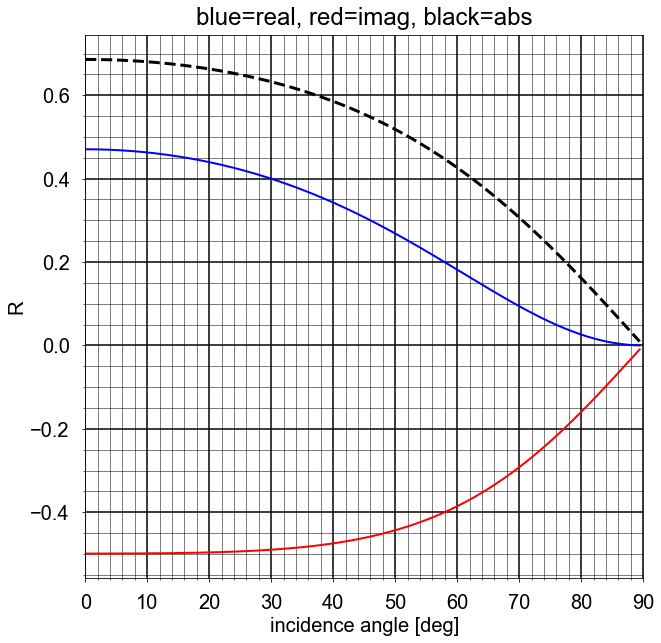

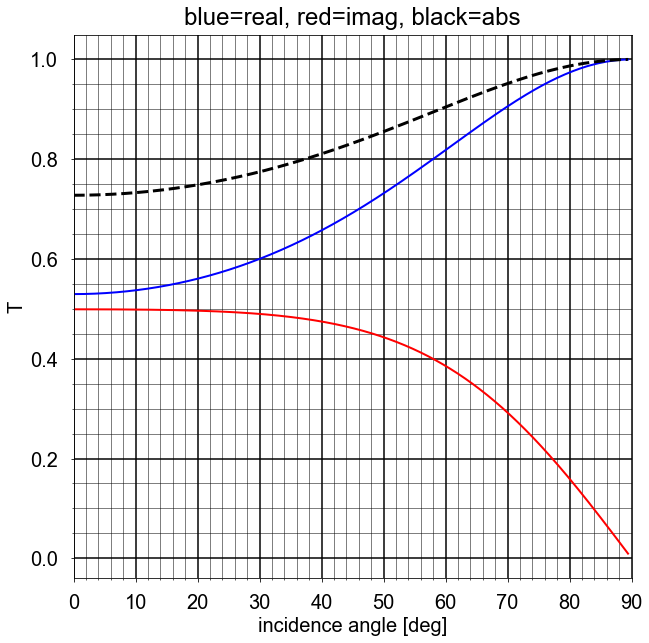

In [5]:
# Reflection coefficient
fig=plt.figure(figsize=(10,10))
plt.plot(np.real(phi_i)*180.0/np.pi,np.real(R),'b',linewidth=2)
plt.plot(np.real(phi_i)*180.0/np.pi,np.imag(R),'r',linewidth=2)
plt.plot(np.real(phi_i)*180.0/np.pi,np.abs(R),'--k',linewidth=3)
plt.minorticks_on()
plt.grid(which='major',color='k',linewidth=1.5)
plt.grid(which='minor',color='k',linewidth=0.5)
plt.xlabel('incidence angle [deg]')
plt.ylabel('R')
plt.xlim([0.0,90.0])
plt.title('blue=real, red=imag, black=abs',pad=10)
plt.show()

# Transmission coefficient.
fig=plt.figure(figsize=(10,10))
plt.plot(np.real(phi_i)*180.0/np.pi,np.real(T),'b',linewidth=2)
plt.plot(np.real(phi_i)*180.0/np.pi,np.imag(T),'r',linewidth=2)
plt.plot(np.real(phi_i)*180.0/np.pi,np.abs(T),'--k',linewidth=3)
plt.minorticks_on()
plt.grid(which='major',color='k',linewidth=1.5)
plt.grid(which='minor',color='k',linewidth=0.5)
plt.xlabel('incidence angle [deg]')
plt.ylabel('T')
plt.xlim([0.0,90.0])
plt.title('blue=real, red=imag, black=abs',pad=10)
plt.show()